In [14]:
import os
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

from autoencoder import Autoencoder
from solver import train_vali_all_epochs, dev_train_vali_all_epochs

In [15]:
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

batch_size = 128
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=6)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=6)

In [16]:
run_id = datetime.today().strftime("%Y-%m-%d_%H-%M-%S")
save_path = os.getenv("HOME") + '/sparsify_models/AE/MNIST/' +run_id +'/'
print(save_path)

/home/david/sparsify_models/AE/MNIST/2024-11-13_21-23-02/


In [17]:
# Convert MNIST data to numpy arrays
train_images = []
train_labels = []

for batch_idx, (data, target) in enumerate(train_loader):
    data = Variable(data).to('cuda')
    input = data.view(data.size(0), -1).to('cuda')
    train_images.append(input.cpu().numpy())
    train_labels.append(target.cpu().numpy())

train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)

test_images = []
test_labels = []

for batch_idx, (data, target) in enumerate(test_loader):
    data = Variable(data).to('cuda')
    input = data.view(data.size(0), -1).to('cuda')
    test_images.append(input.cpu().numpy())
    test_labels.append(target.cpu().numpy())

test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

### Training SAE and DAE

In [18]:
model = Autoencoder(n_input=784, n_hidden_ls=[512, 128, 32], n_layers=3)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.99)

train_losses, vali_losses = train_vali_all_epochs(
    model, 
    train_loader, 
    test_loader, 
    optimizer, 
    n_epochs=10, 
    device=torch.device('cuda'), 
    save_path=save_path+'Static/'
    )

Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000212: 100%|██████████| 469/469 [00:01<00:00, 263.68it/s]


====> Epoch: 0 Average loss: 0.0349


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:308: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0194
Directory created: /home/david/sparsify_models/AE/MNIST/2024-11-13_21-23-02/Static/
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000184: 100%|██████████| 469/469 [00:01<00:00, 271.86it/s]

====> Epoch: 1 Average loss: 0.0182


====> Test set loss: 0.0170
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000177: 100%|██████████| 469/469 [00:01<00:00, 271.50it/s]


====> Epoch: 2 Average loss: 0.0174
====> Test set loss: 0.0169
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000182: 100%|██████████| 469/469 [00:01<00:00, 281.21it/s]

====> Epoch: 3 Average loss: 0.0173


====> Test set loss: 0.0169
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000183: 100%|██████████| 469/469 [00:01<00:00, 274.24it/s]


====> Epoch: 4 Average loss: 0.0173
====> Test set loss: 0.0169
Weights saved.


Train Epoch: 5 [44928/60000 (100%)]	Loss: 0.000176: 100%|██████████| 469/469 [00:01<00:00, 245.68it/s]

====> Epoch: 5 Average loss: 0.0173


====> Test set loss: 0.0169
Weights saved.


Train Epoch: 6 [44928/60000 (100%)]	Loss: 0.000188: 100%|██████████| 469/469 [00:01<00:00, 257.72it/s]

====> Epoch: 6 Average loss: 0.0173


====> Test set loss: 0.0169
Weights saved.


Train Epoch: 7 [44928/60000 (100%)]	Loss: 0.000170: 100%|██████████| 469/469 [00:01<00:00, 262.11it/s]

====> Epoch: 7 Average loss: 0.0173


====> Test set loss: 0.0169
Weights saved.


Train Epoch: 8 [44928/60000 (100%)]	Loss: 0.000169: 100%|██████████| 469/469 [00:01<00:00, 252.84it/s]


====> Epoch: 8 Average loss: 0.0173
====> Test set loss: 0.0169
Weights saved.


Train Epoch: 9 [44928/60000 (100%)]	Loss: 0.000173: 100%|██████████| 469/469 [00:01<00:00, 252.58it/s]


====> Epoch: 9 Average loss: 0.0173
====> Test set loss: 0.0169
Weights saved.
All train losses saved.


In [19]:
dev_model = Autoencoder(n_input=784, n_hidden_ls=[512, 128, 32], n_layers=3)
dev_optimizer = torch.optim.SGD(dev_model.parameters(), lr=0.5, momentum=0.99)

size_ls = [4,10,16,32]
manner = 'cell_division'

dev_train_vali_all_epochs(
    dev_model,
    size_ls,
    manner,
    train_loader,
    test_loader,
    optimizer,
    n_epochs=10,
    device='cpu',
    save_path=save_path+'Dev/{}/'.format(manner)
    )

Directory created: /home/david/sparsify_models/AE/MNIST/2024-11-13_21-23-02/Dev/cell_division/


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.001219: 100%|██████████| 469/469 [00:03<00:00, 125.67it/s]

====> Epoch: 0 Average loss: 0.1240


====> Test set loss: 0.1264
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:184: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(save_path + 'model_weights_epoch

====> Epoch: 1 Average loss: 0.0614


====> Test set loss: 0.0497
Weights saved.
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000528: 100%|██████████| 469/469 [00:04<00:00, 110.21it/s]


====> Epoch: 2 Average loss: 0.0493
====> Test set loss: 0.0481
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000468: 100%|██████████| 469/469 [00:04<00:00, 106.63it/s]

====> Epoch: 3 Average loss: 0.0472


====> Test set loss: 0.0445
Weights saved.
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000451: 100%|██████████| 469/469 [00:03<00:00, 119.88it/s]

====> Epoch: 4 Average loss: 0.0436


====> Test set loss: 0.0422
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [44928/60000 (100%)]	Loss: 0.000395: 100%|██████████| 469/469 [00:03<00:00, 120.64it/s]


====> Epoch: 5 Average loss: 0.0410
====> Test set loss: 0.0386
Weights saved.
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [44928/60000 (100%)]	Loss: 0.000367: 100%|██████████| 469/469 [00:03<00:00, 122.68it/s]

====> Epoch: 6 Average loss: 0.0369


====> Test set loss: 0.0341
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [44928/60000 (100%)]	Loss: 0.000343: 100%|██████████| 469/469 [00:03<00:00, 121.92it/s]


====> Epoch: 7 Average loss: 0.0336
====> Test set loss: 0.0323
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [44928/60000 (100%)]	Loss: 0.000321: 100%|██████████| 469/469 [00:03<00:00, 119.94it/s]


====> Epoch: 8 Average loss: 0.0324
====> Test set loss: 0.0317
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [44928/60000 (100%)]	Loss: 0.000346: 100%|██████████| 469/469 [00:03<00:00, 124.44it/s]

====> Epoch: 9 Average loss: 0.0321


====> Test set loss: 0.0316
Weights saved.
All train losses saved.


([0.12401275730717665,
  0.06136203836848233,
  0.049313220928218576,
  0.04717493681574681,
  0.04362518732735851,
  0.041038263080788576,
  0.03691972967689988,
  0.0335889178187227,
  0.03243857010928934,
  0.03212244793582064],
 [0.12637330327607407,
  0.049714682364388356,
  0.04807254643757132,
  0.0445371747865707,
  0.042203810584696036,
  0.03855222331572183,
  0.034065472598694545,
  0.03226721119371396,
  0.03172949380889724,
  0.0315772064407415])

### Retrieve encodings

In [20]:
train_encodings = []
train_labels = []

with torch.no_grad():
    for batch_idx, (data, target) in enumerate(train_loader):
        data = Variable(data).to('cuda')
        input = data.view(data.size(0), -1).to('cuda')
        encoded, decoded = model(input)
        train_encodings.append(encoded.cpu().detach().numpy())
        train_labels.append(target.cpu().numpy())

train_encodings = np.concatenate(train_encodings)
train_labels = np.concatenate(train_labels)

test_encodings = []
test_labels = []

with torch.no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        data = Variable(data).to('cuda')
        input = data.view(data.size(0), -1).to('cuda')
        encoded, decoded = model(input)
        test_encodings.append(encoded.cpu().detach().numpy())
        test_labels.append(target.cpu().numpy())

test_encodings = np.concatenate(test_encodings)
test_labels = np.concatenate(test_labels)

In [21]:
dev_train_encodings = []
dev_train_labels = []

with torch.no_grad():
    for batch_idx, (data, target) in enumerate(train_loader):
        data = Variable(data).to('cuda')
        input = data.view(data.size(0), -1).to('cpu')
        encoded, decoded = dev_model(input)
        dev_train_encodings.append(encoded.cpu().detach().numpy())
        dev_train_labels.append(target.cpu().numpy())

dev_train_encodings = np.concatenate(dev_train_encodings)
dev_train_labels = np.concatenate(dev_train_labels)

dev_test_encodings = []
dev_test_labels = []

with torch.no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        data = Variable(data).to('cuda')
        input = data.view(data.size(0), -1).to('cpu')
        encoded, decoded = dev_model(input)
        dev_test_encodings.append(encoded.cpu().detach().numpy())
        dev_test_labels.append(target.cpu().numpy())

dev_test_encodings = np.concatenate(dev_test_encodings)
dev_test_labels = np.concatenate(dev_test_labels)

### Classifying encodings of SAE and DAE with a Linear SVC

In [22]:
svc = LinearSVC(max_iter=1000, C=1.0)
svc.fit(train_encodings, train_labels)

predictions = svc.predict(test_encodings)
accuracy = accuracy_score(test_labels, predictions)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.8865


In [23]:
dev_svc = LinearSVC(max_iter=1000, C=1.0)
dev_svc.fit(dev_train_encodings, dev_train_labels)

predictions = dev_svc.predict(dev_test_encodings)
accuracy = accuracy_score(dev_test_labels, predictions)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.7377


### Adding noise

In [24]:
def add_gaussian_noise(raw_data, var):
    noisy_data = []
    for original in raw_data:
        noisy = random_noise(original, mode='gaussian', var=var)
        noisy_data.append(noisy)
    
    return noisy_data

def add_poisson_noise(raw_data):
    noisy_data = []
    for original in raw_data:
        noisy = random_noise(original, mode='poisson')
        noisy_data.append(noisy)
    
    return noisy_data

def add_sp_noise(raw_data, amount):
    noisy_data = []
    for original in raw_data:
        noisy = random_noise(original, mode='s&p', amount=amount)
        noisy_data.append(noisy)
    
    return noisy_data


noisy_test_images = add_sp_noise(test_images, 0.2)

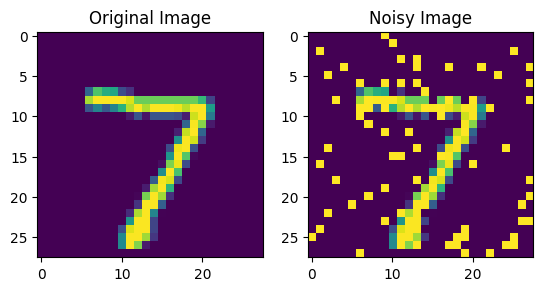

In [25]:
plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(test_images[0].reshape(28, 28))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(noisy_test_images[0].reshape(28, 28))
plt.title('Noisy Image')

plt.show()

### Classifying noisy reconstructions of SAE and DAE with Linear SVC

In [26]:
noisy_test_encodings = []
model.eval()

for image in noisy_test_images:
    image = torch.tensor(image).float().to('cuda')
    input = image.view(1, -1).to('cuda')
    encoded, decoded = model(input)
    noisy_test_encodings.append(encoded.cpu().detach().numpy())

noisy_test_encodings = np.concatenate(noisy_test_encodings, axis=0)

In [27]:
noisy_dev_test_encodings = []
dev_model.eval()

for image in noisy_test_images:
    image = torch.tensor(image).float().to('cpu')
    input = image.view(1, -1).to('cpu')
    encoded, decoded = dev_model(input)
    noisy_dev_test_encodings.append(encoded.cpu().detach().numpy())

noisy_dev_test_encodings = np.concatenate(noisy_dev_test_encodings, axis=0)

In [28]:
noisy_ae_predictions = svc.predict(noisy_test_encodings)
accuracy = accuracy_score(noisy_ae_predictions, test_labels)
print(f'AE Test Accuracy: {accuracy:.4f}')

noisy_dae_predictions = dev_svc.predict(noisy_dev_test_encodings)
accuracy = accuracy_score(noisy_dae_predictions, test_labels)
print(f'DAE Test Accuracy: {accuracy:.4f}')

AE Test Accuracy: 0.8066
DAE Test Accuracy: 0.3566


In [29]:
noisy_train_encodings = []
dev_model.eval()

for image in add_gaussian_noise(train_images, 0.1):
    image = torch.tensor(image).float().to('cpu')
    input = image.view(1, -1).to('cpu')
    encoded, decoded = dev_model(input)
    noisy_train_encodings.append(encoded.cpu().detach().numpy())

noisy_train_encodings = np.concatenate(noisy_train_encodings, axis=0)

noisy_dev_train_encodings = []
dev_model.eval()

for image in add_gaussian_noise(train_images, 0.1):
    image = torch.tensor(image).float().to('cpu')
    input = image.view(1, -1).to('cpu')
    encoded, decoded = dev_model(input)
    noisy_dev_train_encodings.append(encoded.cpu().detach().numpy())

noisy_dev_train_encodings = np.concatenate(noisy_dev_train_encodings, axis=0)

In [30]:
# Testing a SVC trained on noisy DAE encodings
noisy_svc = LinearSVC(max_iter=1000, C=1.0)
noisy_svc.fit(noisy_train_encodings, train_labels)

predictions = noisy_svc.predict(noisy_test_encodings)
accuracy = accuracy_score(test_labels, predictions)

print(f'Noisy AE Test Accuracy: {accuracy:.4f}')

noisy_dev_svc = LinearSVC(max_iter=1000, C=1.0)
noisy_dev_svc.fit(noisy_dev_train_encodings, train_labels)

predictions = noisy_dev_svc.predict(noisy_dev_test_encodings)
dev_accuracy = accuracy_score(test_labels, predictions)

print(f'Noisy DAE Test Accuracy: {dev_accuracy:.4f}')

Noisy AE Test Accuracy: 0.0593
Noisy DAE Test Accuracy: 0.1130


In [31]:
data = []

for var in [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]:
    noisy_test_images = add_gaussian_noise(test_images, var)
    noisy_test_encodings = []
    model.eval()

    for image in noisy_test_images:
        image = torch.tensor(image).float().to('cuda')
        input = image.view(1, -1).to('cuda')
        encoded, decoded = model(input)
        noisy_test_encodings.append(encoded.cpu().detach().numpy())

    noisy_test_encodings = np.concatenate(noisy_test_encodings, axis=0)

    noisy_ae_predictions = svc.predict(noisy_test_encodings)
    accuracy = accuracy_score(noisy_ae_predictions, test_labels)
    data.append((var, accuracy))

# Options to evaluate
- Noisy images -> encode -> classify
    - SVC trained on original images (data too large)
    - SVC trained on noisy images (data too large)
- Noisy encodings -> classify
    - SVC trained on original encodings (SAE = 0.82, DAE = 0.39)
    - SVC trained on noisy encodings (SAE = 0.06, DAE = 0.11)

In [32]:
# noisy_images_train
# noisy_images_test
# noisy_image_encodings_train
# noisy_image_encodings_test

# train_images
# test_images
# noisy_encodings_test
# noisy_encodings_train

noisy_images_train = add_gaussian_noise(train_images, 0.1)
noisy_images_test = add_gaussian_noise(test_images, 0.1)

noisy_image_encodings_train = []
model.eval()
for image in noisy_images_train:
    image = torch.tensor(image).float().to('cuda')
    input = image.view(1, -1).to('cuda')
    encoded, decoded = model(input)
    noisy_image_encodings_train.append(encoded.cpu().detach().numpy())
noisy_image_encodings_train = np.concatenate(noisy_image_encodings_train, axis=0)

noisy_image_encodings_test = []
model.eval()
for image in noisy_images_test:
    image = torch.tensor(image).float().to('cuda')
    input = image.view(1, -1).to('cuda')
    encoded, decoded = model(input)
    noisy_image_encodings_test.append(encoded.cpu().detach().numpy())
noisy_image_encodings_test = np.concatenate(noisy_image_encodings_test, axis=0)

train_images = train_images
test_images = test_images

noisy_encodings_train = []
for image in train_images:
    image = torch.tensor(image).float().to('cuda')
    input = image.view(1, -1).to('cuda')
    encoded, decoded = model(input)
    noisy_encodings_train.append(encoded.cpu().detach().numpy())
noisy_encodings_train = np.concatenate(noisy_encodings_train, axis=0)

noisy_encodings_test = []
for image in test_images:
    image = torch.tensor(image).float().to('cuda')
    input = image.view(1, -1).to('cuda')
    encoded, decoded = model(input)
    noisy_encodings_test.append(encoded.cpu().detach().numpy())
noisy_encodings_test = np.concatenate(noisy_encodings_test, axis=0)

svc = LinearSVC(max_iter=1000, C=1.0)
svc.fit(train_images, train_labels)
predictions = svc.predict(test_images)
accuracy1 = accuracy_score(predictions, test_labels)
print(accuracy1)

dev_svc = LinearSVC(max_iter=1000, C=1.0)
dev_svc.fit(train_images, train_labels)
predictions = dev_svc.predict(test_images)
accuracy2 = accuracy_score(predictions, test_labels)
print(accuracy2)

predictions = svc.predict(noisy_images_test)
accuracy3 = accuracy_score(predictions, test_labels)
print(accuracy3)

predictions = dev_svc.predict(noisy_images_test)
accuracy4 = accuracy_score(predictions, test_labels)
print(accuracy4)

noisy_svc = LinearSVC(max_iter=1000, C=1.0)
noisy_svc.fit(noisy_images_train, train_labels)
predictions = noisy_svc.predict(noisy_images_test)
accuracy5 = accuracy_score(test_labels, predictions)
print(accuracy5)

noisy_dev_svc = LinearSVC(max_iter=1000, C=1.0)
noisy_dev_svc.fit(noisy_images_train, train_labels)
predictions = noisy_dev_svc.predict(noisy_images_test)
accuracy6 = accuracy_score(test_labels, predictions)
print(accuracy6)

In [ ]:
def plot_noise_impact(data):
    plt.figure(figsize=(12, 6))
    
    plt.plot([d['noiseVar'] for d in data], [d['gaussianAccuracy'] for d in data], label='Gaussian Noise')
    plt.plot([d['noiseVar'] for d in data], [d['poissonAccuracy'] for d in data], label='Poisson Noise')
    plt.plot([d['noiseVar'] for d in data], [d['saltPepperAccuracy'] for d in data], label='Salt & Pepper Noise')
    
    plt.xlabel('Noise Variance')
    plt.ylabel('Accuracy')
    plt.title('Impact of Noise on Autoencoder Encoding Classification')
    plt.legend()
    plt.grid()
    
    plt.show()
    
data = [
    {'noiseVar': 0.01, 'gaussianAccuracy': 0.92, 'poissonAccuracy': 0.89, 'saltPepperAccuracy': 0.85},
    {'noiseVar': 0.05, 'gaussianAccuracy': 0.87, 'poissonAccuracy': 0.84, 'saltPepperAccuracy': 0.78},
    {'noiseVar': 0.1, 'gaussianAccuracy': 0.81, 'poissonAccuracy': 0.79, 'saltPepperAccuracy': 0.71},
    {'noiseVar': 0.15, 'gaussianAccuracy': 0.75, 'poissonAccuracy': 0.72, 'saltPepperAccuracy': 0.65},
    {'noiseVar': 0.2, 'gaussianAccuracy': 0.68, 'poissonAccuracy': 0.65, 'saltPepperAccuracy': 0.58},
]

plot_noise_impact(data)